In [62]:
import pandas as pd

In [63]:
import numpy as np

In [64]:
import sklearn

In [65]:
import seaborn as sns

In [66]:
import matplotlib.pyplot as plt

In [67]:
file_path = r"F:\Data_Science_Jupyter_Files\laptop_pricing_dataset_mod2.csv"

In [68]:
df = pd.read_csv(file_path, header=0)

In [69]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [70]:
# Single Linear Regression
from sklearn.linear_model import LinearRegression

In [71]:
lm = LinearRegression()
lm

LinearRegression()

In [72]:
X = df[["CPU_frequency"]]
Y = df["Price"]

In [73]:
lm.fit(X,Y)

LinearRegression()

In [74]:
Yhat = lm.predict(X)
Yhat[0:5]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

In [75]:
lm.intercept_

np.float64(253.6611706858214)

In [76]:
lm.coef_

array([1485.19362648])

In [77]:
Yhat = 253.66 + 1485.19*X
Yhat.head()

,CPU_frequency
0,1073.075172
1,1277.928966
2,1636.423103
3,1073.075172
4,1175.502069


C:\Users\HP\AppData\Local\Temp\ipykernel_1896\208151239.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Value")
C:\Users\HP\AppData\Local\Temp\ipykernel_1896\208151239.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

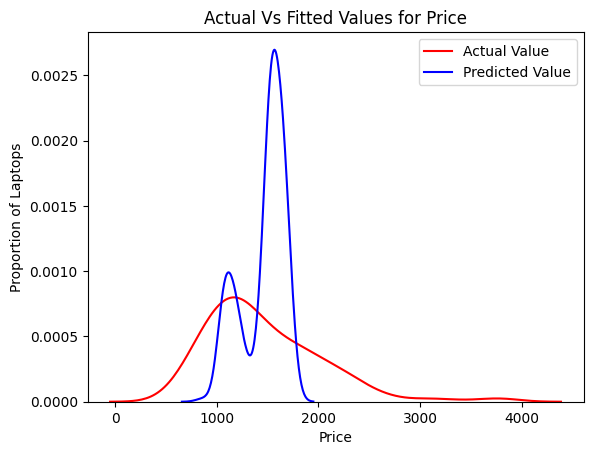

In [78]:
%matplotlib inline
ax1 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title("Actual Vs Fitted Values for Price")
plt.xlabel("Price")
plt.ylabel("Proportion of Laptops")
plt.legend(["Actual Value", "Predicted Value"])
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error
r_square_slr = lm.score(X,Y)
print("r square is: ", r_square_slr)
mse_slr = mean_squared_error(df["Price"], Yhat)
print("mean square error is: ", mse_slr)

r square is:  0.1344436321024326
mean square error is:  284583.44060411723


In [80]:
# Multiple Linear Regression
Z = df[["CPU_frequency", "RAM_GB", "Storage_GB_SSD", "CPU_core", "OS", "GPU", "Category"]]

In [81]:
lm.fit(Z,df["Price"])

LinearRegression()

In [82]:
lm.intercept_

np.float64(-841.9913259091256)

In [83]:
lm.coef_

array([ 9.61283977e+02,  8.68089292e+01,  3.94604825e-01,  6.56633979e+01,
       -4.27445318e+02,  9.78000871e+01,  1.91295466e+02])

In [84]:
Y_hat = lm.predict(Z)
Y_hat[0:5]

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022])

C:\Users\HP\AppData\Local\Temp\ipykernel_1896\1276105408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Value")
C:\Users\HP\AppData\Local\Temp\ipykernel_1896\1276105408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

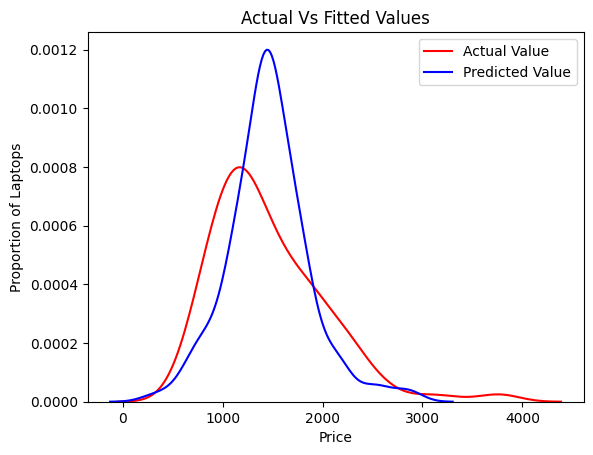

In [85]:
ax2 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax2)
plt.title("Actual Vs Fitted Values")
plt.xlabel("Price")
plt.ylabel("Proportion of Laptops")
plt.legend(["Actual Value", "Predicted Value"])
plt.show()

In [86]:
r_square_mlr = lm.score(Z,Y)
print("r square value is: ", r_square_mlr)
Y_hat_mlr = lm.predict(Z)
mean_square_error_mlr = mean_squared_error(df["Price"], Y_hat_mlr)
print("mean square error is: ", mean_square_error_mlr)

r square value is:  0.5082509055187376
mean square error is:  161680.57263893104


In [88]:
# Polynomial Regression
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)
f2 = np.polyfit(X, Y, 3)
p2 = np.poly1d(f2)
f3 = np.polyfit(X, Y, 5)
p3 = np.poly1d(f3)

In [89]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
    plt.title(f"Polynomial fit for Price ~ {Name}")
    plt.xlabel(Name)
    plt.ylabel("Price of Laptops")

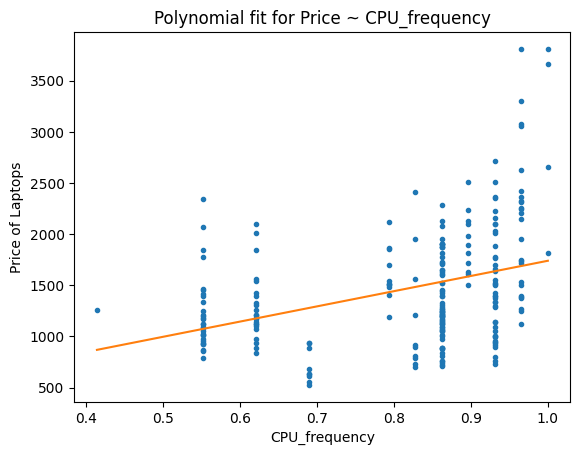

In [90]:
PlotPolly(p1, X, Y, "CPU_frequency")

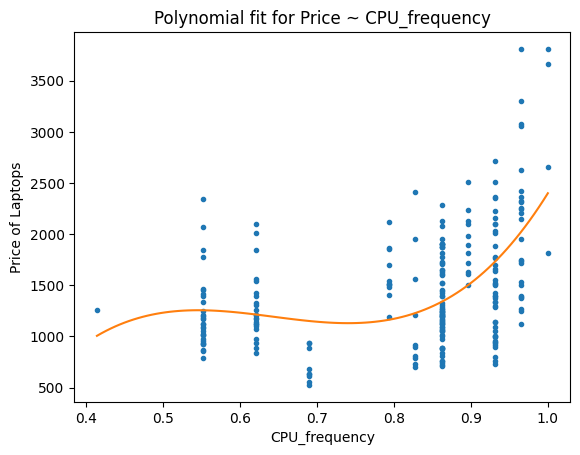

In [91]:
PlotPolly(p2, X, Y, "CPU_frequency")

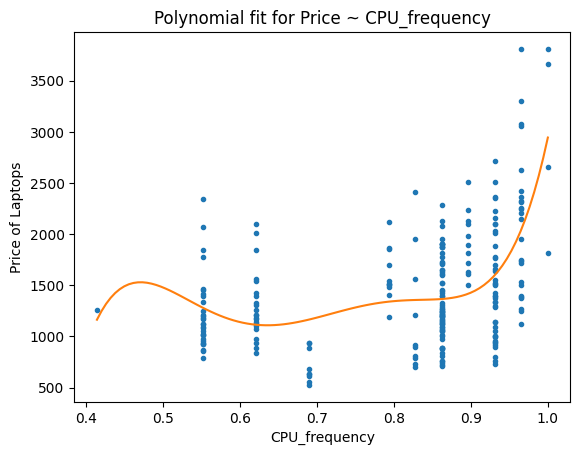

In [92]:
PlotPolly(p3, X, Y, "CPU_frequency")

In [93]:
from sklearn.metrics import r2_score

In [94]:
r_squared_p1 = r2_score(Y, p1(X))
print("r square value for p1: ", r_squared_p1)
mse_p1 = mean_squared_error(Y, p1(X))
print("mean square error for p1: ", mse_p1)

r_squared_p2 = r2_score(Y, p2(X))
print("r square value for p2: ", r_squared_p2)
mse_p2 = mean_squared_error(Y, p2(X))
print("mean square error for p2: ", mse_p2)

r_squared_p3 = r2_score(Y, p3(X))
print("r square value for p3: ", r_squared_p3)
mse_p3 = mean_squared_error(Y, p3(X))
print("mean square error for p3: ", mse_p3)

r square value for p1:  0.1344436321024326
mean square error for p1:  284583.4405868629
r square value for p2:  0.2669264079653113
mean square error for p2:  241024.86303848765
r square value for p3:  0.3030822706443915
mean square error for p3:  229137.29548053455


In [97]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [98]:
Input = [("scale", StandardScaler()),
        ("polynomial", PolynomialFeatures(include_bias=False)),
        ("model", LinearRegression())]

In [99]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [101]:
Z = Z.astype(float)
pipe.fit(Z, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [102]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([1484.18227261,  778.36551848, 1267.81424349, 1009.69942066])

In [103]:
r_square_pipe = r2_score(Y, ypipe)
print("r square is: ", r_square_pipe)
mse_pipe = mean_squared_error(Y, ypipe)
print("mean square error is: ", mse_pipe)

r square is:  0.6332094535859658
mean square error is:  120595.86128028373
